# Water mass transformation code
Adapted from Elizabeth Maroon

Outstanding questions:
- Slow steps. Can we speed them up?
- Other parts of FW budget terms from POP (discuss terms)
- Should we be concerned that Heat flux is so much smaller? Is something going wrong?
- Compare WMT from coastal vs. all S.Ocn masked areas and discuss

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pop_tools
from datetime import timedelta
import glob

In [9]:
#choose cases and data paths
case1 = 'b.e21.B1850.f09_g17.CMIP6-piControl.001b'
case2 = 'b.e21.B1850.f09_g17.CMIP6-piControl.001_bl99b'
label1 = 'MUSHY'
label2 = 'BL99'

data_dir1 = '/glade/campaign/cgd/ppc/dbailey/'+case1+'/ocn/proc/tseries/month_1/'
data_dir2 = '/glade/campaign/cgd/ppc/dbailey/'+case2+'/ocn/proc/tseries/month_1/'
varsneeded = ['SALT', 'TEMP', 'SHF', 'SFWF']

# FOR TOTAL FRESH WATER BUDGET, NEED THESE TERMS. DOUBLE CHECK...
#varsneeded = ['SALT', 'TEMP', 'SHF', 'SFWF','EVAP_F','ROFF_F','IOFF_F','SNOW_F','PREC_F','MELT_F','SALT_F']
# Look in pop code: forcing_coupled.f90
# EVAP_F + PREC_F + MELT_F + ROFF_F + IOFF_F + SALT_F

In [11]:
#reading in files
ds1 = []
ds2 = []
for varname in varsneeded:
    # This loop takes a long time
    #my_files=sorted(glob.glob(data_dir1+case1+'.pop.h.'+varname+'.*.nc'))[-2:]
    #ds1.append(xr.open_mfdataset(my_files,combine='by_coords',chunks={}))
    #my_files=sorted(glob.glob(data_dir2+case2+'.pop.h.'+varname+'.*.nc'))[-2:]
    #ds2.append(xr.open_mfdataset(my_files,combine='by_coords',chunks={}))
    
    # TEST WITH SINGLE FILE OPENING
    ds1.append(xr.open_dataset(data_dir1+case1+'.pop.h.'+varname+'.092101-097012.nc'))
    ds2.append(xr.open_dataset(data_dir2+case2+'.pop.h.'+varname+'.092101-097012.nc'))
    
ds1=xr.merge(ds1)
ds2=xr.merge(ds2)

## Just coastal points for WMT

In [12]:
# Load in coastal mask
ds_masks = xr.open_mfdataset('/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/DATA/masks/antarctic_ocean_masks_2.nc')
my_mask = ds_masks['coast_mask']

/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'sh_mask' has multiple fill values {1e+30, 0.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'socn_mask' has multiple fill values {0, -2147483647}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'Wed_mask' has multiple fill values {1e+30, 0.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'Ross_mask' has multiple fill values {1e+30, 0.0}, decoding all values to NaN.
  de

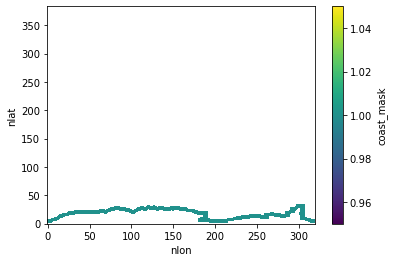

In [13]:
my_mask.plot()

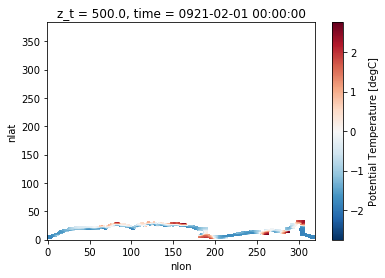

In [14]:
#region to perform WMT over - coastal mask only 
ds1=ds1.isel(z_t=0).where(my_mask==1)
ds2=ds2.isel(z_t=0).where(my_mask==1)

#test that masking worked properly
ds1["TEMP"].isel(time=0).plot()

In [15]:
# this step is SLOW
ds1.load()
ds2.load()

<xarray.Dataset>
Dimensions:                 (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 600, transport_comp: 5, transport_reg: 2, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    z_t                     float32 500.0
  * z_t_150m                (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                     (z_w) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_top                 (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_bot                 (z_w_bot) float32 1000.0 2000.0 ... 549999.06
  * lat_aux_grid            (lat_aux_grid) float32 -79.48815 -78.952896 ... 90.0
  * moc_z                   (moc_z) float32 0.0 1000.0 ... 525000.94 549999.06
    ULONG                   (nlat, nlon) float64 321.1 322.3 ... 319.6 320.0
    ULAT                    (nlat, nlon) float64 -78.95 -78.95 ... 72.41 72.41
    TLONG                   (nlat, nlon) float64 320.6 321.7 ... 319.4 319.8
    TLAT                    (nlat, nlon) float64 -79.22 -79.22 ... 72.19 72.19
  * time                    (time) object 0921-02-01 00:00:00 ... 0971-01-01 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    moc_components          (moc_comp, nlat, nlon) object nan nan ... nan nan
    transport_components    (transport_comp, nlat, nlon) object nan nan ... nan
    transport_regions       (transport_reg, nlat, nlon) object nan nan ... nan
    dz                      (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    dzw                     (z_w, nlat, nlon) float32 nan nan nan ... nan nan
    KMT                     (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    KMU                     (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    REGION_MASK             (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    UAREA                   (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    TAREA                   (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    HU                      (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    HT                      (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    DXU                     (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    DYU                     (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    DXT                     (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    DYT                     (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    HTN                     (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    HTE                     (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    HUS                     (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    HUW                     (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    ANGLE                   (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    ANGLET                  (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    days_in_norm_year       (nlat, nlon) timedelta64[ns] NaT NaT NaT ... NaT NaT
    grav                    (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    omega                   (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    radius                  (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    cp_sw                   (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    sound                   (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    vonkar                  (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    cp_air                  (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    rho_air                 (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    rho_sw                  (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    rho_fw                  (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    stefan_boltzmann        (nlat, nlon) float64 nan nan nan nan ... nan nan nan
    latent_heat_va

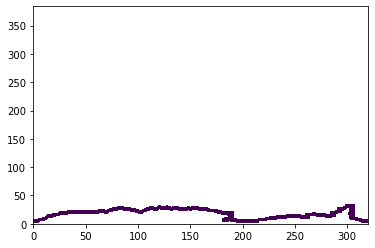

In [16]:
# set some values
s0=ds1['ocn_ref_salinity']
cp=ds1['cp_sw']/1000

# get grid information
tlat=ds1['TLAT']
tlon=ds1['TLONG']
tarea=ds1['TAREA']/(100*100)  # convert to m2
depth=ds1['z_t']
ht=ds1['HT']
depth_top=depth.where(depth<ht, np.nan)/100

# make a quick plot of the area the WMT is done over
plt.pcolormesh(depth_top)

In [17]:
## CASE1
salt1=ds1['SALT']
temp1=ds1['TEMP']

#get stuff from POP EOS
rho1,drhods1,drhodt1=pop_tools.eos(salt=salt1,temp=temp1,return_coefs=True,depth=depth_top)

#construct alpha and beta using POP methods
alpha1=-1*drhodt1/rho1
beta1=drhods1/rho1

#put SHF and FW fluxes into units that can be scaled by alpha and beta
shf_scaled1=ds1['SHF']/cp
fw_scaled1=ds1['SFWF']*(salt1/1000)/(1-salt1/1000)

#multiply by alpha and beta to get density fluxes
heatpart1=-alpha1*shf_scaled1
fwpart1=-1*fw_scaled1*beta1

#combine to get total boundary forced density flux
densflux1=heatpart1+fwpart1

In [18]:
## CASE2
salt2=ds2['SALT']
temp2=ds2['TEMP']

#get stuff from POP EOS
rho2,drhods2,drhodt2=pop_tools.eos(salt=salt2,temp=temp2,return_coefs=True,depth=depth_top)

#construct alpha and beta using POP methods
alpha2=-1*drhodt2/rho2
beta2=drhods2/rho2

#put SHF and FW fluxes into units that can be scaled by alpha and beta
shf_scaled2=ds2['SHF']/cp
fw_scaled2=ds2['SFWF']*(salt2/1000)/(1-salt2/1000)

#multiply by alpha and beta to get density fluxes
heatpart2=-alpha2*shf_scaled2
fwpart2=-1*fw_scaled2*beta2

#combine to get total boundary forced density flux
densflux2=heatpart2+fwpart2

In [19]:
#set up density classes - goes from 1023.0 to 1028.9 in 0.1 interval
binsize = 0.1 #typical value used
dens_class = np.arange(np.floor(rho1.min()),np.ceil(rho1.max()),binsize)

sigma = xr.DataArray(dens_class[0:-1]+binsize/2-1000, dims=['sigma'], coords={'sigma':dens_class[0:-1]+binsize/2-1000})

In [20]:
#calculate the WMT (total)
wmt1=[]
wmt2=[]

for ii in range(len(dens_class[0:-1])):
    # CASE 1
    densf_byclass = densflux1.where((rho1>=dens_class[ii]) & (rho1<dens_class[ii+1]),np.nan)
    wmt1.append((densf_byclass*tarea).sum(['nlat','nlon'])/binsize)
    # CASE 2
    densf_byclass = densflux2.where((rho2>=dens_class[ii]) & (rho2<dens_class[ii+1]),np.nan)
    wmt2.append((densf_byclass*tarea).sum(['nlat','nlon'])/binsize)


# Set sigma as a coordinate in the arrays
wmt1 = xr.concat(wmt1, dim = sigma)
wmt2 = xr.concat(wmt2, dim = sigma)
   
wmf1 = - wmt1.diff('sigma')/binsize
wmf1 = wmf1.assign_coords({'sigma':sigma[0:-1]+binsize/2})
wmf2 = - wmt2.diff('sigma')/binsize
wmf2 = wmf2.assign_coords({'sigma':sigma[0:-1]+binsize/2})

In [21]:
#calculate the WMT (freshwater part only)
wmt1_fresh=[]
wmt2_fresh=[]

for ii in range(len(dens_class[0:-1])):
    # CASE 1
    fw_byclass = fwpart1.where((rho1>=dens_class[ii]) & (rho1<dens_class[ii+1]),np.nan)
    wmt1_fresh.append((fw_byclass*tarea).sum(['nlat','nlon'])/binsize)
    # CASE 2
    fw_byclass = fwpart2.where((rho2>=dens_class[ii]) & (rho2<dens_class[ii+1]),np.nan)
    wmt2_fresh.append((fw_byclass*tarea).sum(['nlat','nlon'])/binsize)

# Set sigma as a coordinate in the arrays
wmt1_fresh = xr.concat(wmt1_fresh, dim = sigma)
wmt2_fresh = xr.concat(wmt2_fresh, dim = sigma)
   
wmf1_fresh = - wmt1_fresh.diff('sigma')/binsize
wmf1_fresh = wmf1_fresh.assign_coords({'sigma':sigma[0:-1]+binsize/2})
wmf2_fresh = - wmt2_fresh.diff('sigma')/binsize
wmf2_fresh = wmf2_fresh.assign_coords({'sigma':sigma[0:-1]+binsize/2})

In [22]:
#calculate the WMT (heat part only)
wmt1_heat=[]
wmt2_heat=[]

for ii in range(len(dens_class[0:-1])):
    # CASE 1
    heat_byclass = heatpart1.where((rho1>=dens_class[ii]) & (rho1<dens_class[ii+1]),np.nan)
    wmt1_heat.append((heat_byclass*tarea).sum(['nlat','nlon'])/binsize)
    # CASE 2
    heat_byclass = heatpart2.where((rho2>=dens_class[ii]) & (rho2<dens_class[ii+1]),np.nan)
    wmt2_heat.append((heat_byclass*tarea).sum(['nlat','nlon'])/binsize)


# Set sigma as a coordinate in the arrays
wmt1_heat = xr.concat(wmt1_heat, dim = sigma)
wmt2_heat = xr.concat(wmt2_heat, dim = sigma)
   
wmf1_heat = - wmt1_heat.diff('sigma')/binsize
wmf1_heat = wmf1_heat.assign_coords({'sigma':sigma[0:-1]+binsize/2})
wmf2_heat = - wmt2_heat.diff('sigma')/binsize
wmf2_heat = wmf2_heat.assign_coords({'sigma':sigma[0:-1]+binsize/2})

Text(0, 0.5, 'WMF (Sv)')

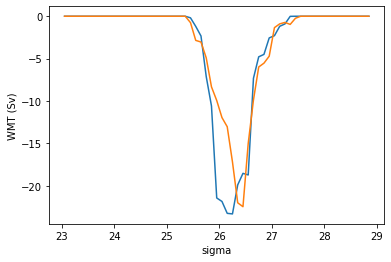

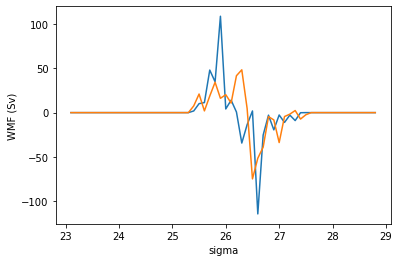

In [23]:
#Plot total transformation - just first timestep to check
f=plt.figure()
plt.plot(wmt1.sigma,wmt1.isel(time=0)/1e6,label=label1)
plt.plot(wmt2.sigma,wmt2.isel(time=0)/1e6,label=label2)
plt.xlabel('sigma')
plt.ylabel('WMT (Sv)')

#formation
f=plt.figure()
plt.plot(wmf1.sigma,wmf1.isel(time=0)/1e6,label=label1)
plt.plot(wmf2.sigma,wmf2.isel(time=0)/1e6,label=label2)
plt.xlabel('sigma')
plt.ylabel('WMF (Sv)')

In [24]:
# Get annual mean WMT values 
wmt1_ann = wmt1.mean(dim="time")
wmf1_ann = wmf1.mean(dim="time")
wmt2_ann = wmt2.mean(dim="time")
wmf2_ann = wmf2.mean(dim="time")

wmt1_fresh_ann = wmt1_fresh.mean(dim="time")
wmf1_fresh_ann = wmf1_fresh.mean(dim="time")
wmt2_fresh_ann = wmt2_fresh.mean(dim="time")
wmf2_fresh_ann = wmf2_fresh.mean(dim="time")

wmt1_heat_ann = wmt1_heat.mean(dim="time")
wmf1_heat_ann = wmf1_heat.mean(dim="time")
wmt2_heat_ann = wmt2_heat.mean(dim="time")
wmf2_heat_ann = wmf2_heat.mean(dim="time")

In [25]:
# calculate differences between two datasets
wmt_ann_diff = wmt1_ann - wmt2_ann
wmf_ann_diff = wmf1_ann - wmf2_ann

wmt_fresh_ann_diff = wmt1_fresh_ann - wmt2_fresh_ann
wmf_fresh_ann_diff = wmf1_fresh_ann - wmf2_fresh_ann

wmt_heat_ann_diff = wmt1_heat_ann - wmt2_heat_ann
wmf_heat_ann_diff = wmf1_heat_ann - wmf2_heat_ann

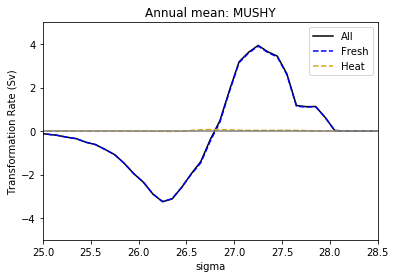

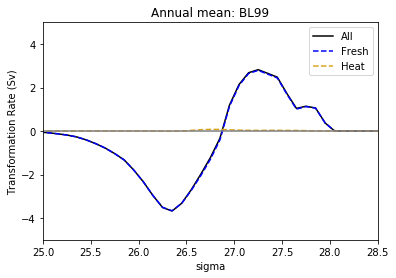

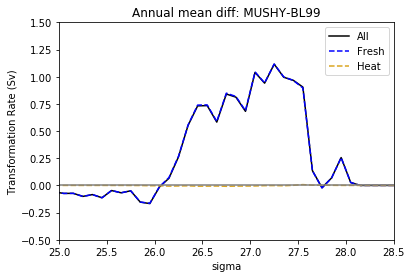

In [30]:
#Plot transformations averaged over all time
f=plt.figure()
plt.plot(wmt1_ann.sigma,wmt1_ann/1e6,label="All",color='black')
plt.plot(wmt1_fresh_ann.sigma,wmt1_fresh_ann/1e6,label="Fresh",color='blue',linestyle='--')
plt.plot(wmt1_heat_ann.sigma,wmt1_heat_ann/1e6,label="Heat",color='goldenrod',linestyle='--')
plt.title('Annual mean: '+label1)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Transformation Rate (Sv)')
plt.ylim([-5,5])
#plt.ylim([-20,5])
plt.axhline(y=0.0, color='grey', linestyle='-')
plt.legend()
plt.savefig(label1+'_coastal_WMT.png', bbox_inches='tight', dpi=200)

f=plt.figure()
plt.plot(wmt2_ann.sigma,wmt2_ann/1e6,label="All",color='black')
plt.plot(wmt2_fresh_ann.sigma,wmt2_fresh_ann/1e6,label="Fresh",color='blue',linestyle='--')
plt.plot(wmt2_heat_ann.sigma,wmt2_heat_ann/1e6,label="Heat",color='goldenrod',linestyle='--')
plt.title('Annual mean: '+label2)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Transformation Rate (Sv)')
plt.ylim([-5,5])
#plt.ylim([-20,5])
plt.axhline(y=0.0, color='grey', linestyle='-')
plt.legend()
plt.savefig(label2+'_coastal_WMT.png', bbox_inches='tight', dpi=200)

#Plot difference in transformation averaged over all time
f=plt.figure()
plt.plot(wmt_ann_diff.sigma,wmt_ann_diff/1e6,label="All",color='black')
plt.plot(wmt_fresh_ann_diff.sigma,wmt_fresh_ann_diff/1e6,label="Fresh",color='blue',linestyle='--')
plt.plot(wmt_heat_ann_diff.sigma,wmt_heat_ann_diff/1e6,label="Heat",color='goldenrod',linestyle='--')
plt.title('Annual mean diff: '+label1+'-'+label2)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Transformation Rate (Sv)')
plt.ylim([-0.5,1.5])
#plt.ylim([-1,3])
plt.axhline(y=0.0, color='grey', linestyle='-')
plt.legend()
plt.savefig(label1+'_minus_'+label2+'_coastal_WMT.png', bbox_inches='tight', dpi=200)

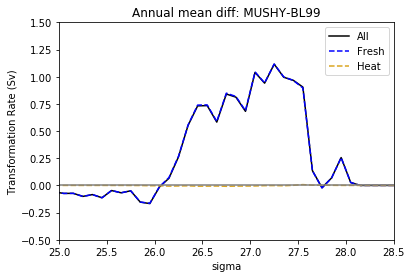

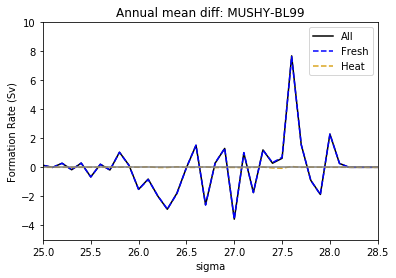

In [27]:
#Plot difference in transformation and formation averaged over all time
f=plt.figure()
plt.plot(wmt_ann_diff.sigma,wmt_ann_diff/1e6,label="All",color='black')
plt.plot(wmt_fresh_ann_diff.sigma,wmt_fresh_ann_diff/1e6,label="Fresh",color='blue',linestyle='--')
plt.plot(wmt_heat_ann_diff.sigma,wmt_heat_ann_diff/1e6,label="Heat",color='goldenrod',linestyle='--')
plt.title('Annual mean diff: '+label1+'-'+label2)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Transformation Rate (Sv)')
#plt.ylim([-1,3])
plt.ylim([-0.5,1.5])
plt.axhline(y=0.0, color='grey', linestyle='-')
plt.legend()

f=plt.figure()
plt.plot(wmf_ann_diff.sigma,wmf_ann_diff/1e6,label="All",color='black')
plt.plot(wmf_fresh_ann_diff.sigma,wmf_fresh_ann_diff/1e6,label="Fresh",color='blue',linestyle='--')
plt.plot(wmf_heat_ann_diff.sigma,wmf_heat_ann_diff/1e6,label="Heat",color='goldenrod',linestyle='--')
plt.title('Annual mean diff: '+label1+'-'+label2)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Formation Rate (Sv)')
plt.ylim([-5,10])
plt.axhline(y=0.0, color='grey', linestyle='-')
plt.legend()

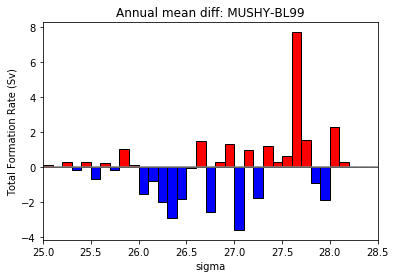

In [31]:
colors = ['red' if (value > 0) else 'blue' for value in wmf_ann_diff]

f=plt.figure()
plt.bar(wmf_ann_diff.sigma,wmf_ann_diff/1e6,align='edge',edgecolor='black',color=colors,width=0.1)
plt.title('Annual mean diff: '+label1+'-'+label2)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Total Formation Rate (Sv)')
plt.axhline(y=0.0, color='grey', linestyle='-')
#plt.axvline(x=28.2, color='grey', linestyle='-')
plt.savefig(label1+'_minus_'+label2+'_coastal_WMF.png', bbox_inches='tight', dpi=200)

To calculate the WMT due to any other process, read in any diag that contributes a freshwater flux, heat flux, or salt flux. Freshwater fluxes get treated the same as SFWF, while heat fluxes get treated the same as SHF. Salt fluxes do not need to be scaled by S/(1-S) like FW fluxes do, but they do need to be multiplied by beta to turn them into density fluxes. It should be possible to fully decompose SHF and SFWF into different contributors.  